In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Método de Euler 

As considerações anteriores sobre malhas numéricas são fundamentais para sugerir a notação que utilizaremos para expressar os métodos numéricos que estudaremos. O primeiro deles, chamado _método de Euler_, é considerado o método numérico mais simples para resolver PVIs. Embora não seja muito eficiente, é o ponto de partida para a compreensão de uma enorme família de métodos. 

Ao longo do texto, denotaremos por $y(t_n) = y_h(t_n) = y_n, \ \ n = 0,1,2,\ldots,N$ a solução aproximada de um PVI.

## Definição do método de Euler 

A derivação do método de Euler inicia-se com a seguinte aproximação para a derivada: 

$$y'(t) \approx \dfrac{y(t+h) - y(t)}{h},$$

conhecida como _aproximação por diferença finita avançada (ou progressiva)_. Se aplicarmos esta definição ao nosso PVI padrão, em $t=t_n$ teremos $y'(t_n) = f(t_n,y(t_n))$, donde segue que 

$$\dfrac{y(t_{n+1}) - y(t_n)}{h} \approx f(t_n,y(t_n))$$
$$y(t_{n+1}) \approx y(t_n) + h \, f(t_n,y(t_n)).$$

O método de Euler toma esta aproximação como exata, de modo que o esquema numérico resultante é 

$$y_{n+1} = y_n + h \, f(t_n,y_n), \ \ 0 \le n \le N-1.$$

A estimativa inicial é $y_0 = Y_0$ ou alguma aproximação de $Y_0$. Quando $Y_0$ é obtido empiricamente, seu valor é conhecido apenas aproximadamente. A fórmula anterior permite o cálculo sequencial das iteradas do método de Euler $y_1,y_2,\ldots,y_n$, aproximações para os valores exatos de $y$ nesses instantes.

## Interpretação geométrica 

A figura a seguir ajuda-nos a interpretar o método de Euler geometricamente. A aproximação numérica da curva exata (azul) é feita por meio de retas tangentes. O valor $y(t_{n+1})$ é erroneamente computado (comprimento $BD$) e excede o valor exato (comprimento $BC$) por uma quantidade (comprimento $CD$). Isto é, a equação da reta tangente a $(t_n,y(t_n))$ é $r(t) = y(t_n) + f(t_n,y(t_n))(t-t_n)$. Na verdade, $r(t_{n+1})$ coincide com o ponto $D$.

Text(2.8, 2.2, 'D')

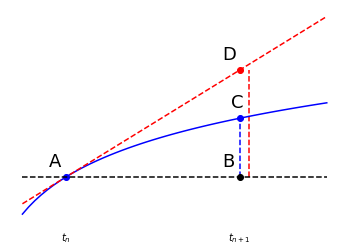

In [2]:
x = np.linspace(0.5,4,50)

plt.plot(x,np.log(x),'b')
x0 = 1.0
x1 = 3.0
plt.plot(x,np.log(x0) + x/x0 -1,'r--')
plt.plot(x0,np.log(x0),'ob')
plt.plot(x1,np.log(x1),'ob')
plt.plot(x1,0,'ok')
plt.plot(x,0*x,'k--')
plt.plot(x1,np.log(x0) + x1/x0 -1,'or')
plt.vlines(x1+0.1,ymin=0,ymax=np.log(x0) + x1/x0 -1,colors='r',linestyles='dashed')
plt.vlines(x1,ymin=0,ymax=np.log(x1),colors='b',linestyles='dashed')


xt = [x0,x1]
plt.box(False)
locs, labels = plt.xticks()
plt.xticks(xt, ('$t_n$','$t_{n+1}$'))
plt.tick_params(axis='both',width=0.0,labelleft=False)

fs = 18
plt.annotate('A',xy=(x0-0.2,np.log(x0)+0.2),fontsize=fs)
plt.annotate('B',xy=(x1-0.2,0+0.2),fontsize=fs)
plt.annotate('C',xy=(x1-0.1,np.log(x1)+0.2),fontsize=fs)
plt.annotate('D',xy=(x1-0.2,np.log(x0) + x1/x0 - 1 +0.2),fontsize=fs)

**Exemplo:** A solução exata do PVI 

$$\begin{cases}
y'(t) = -y(t)\\
y(0) = 1
\end{cases}$$

é $y(t) = e^{-t}$. O método de Euler é dado por 

$$y_{n+1} = y_n - h y_n = (1-h)y_n, \ \ n \geq 0,$$

com $Y_0 = 1$ e $t_n = nh$.

Para $h=0.1$, temos, por exemplo

$$y_1 = (1-h)y_0 = 0.9(1) = 0.9$$
$$y_2 = (1-h)y_1 = 0.9(0.9) = 0.81$$
$$y_2 = (1-h)y_1 = 0.9(0.9) = 0.81,$$

cujos erros são 

$$y_{h,1} - y_1 = e^{-0.1} - y_1 = 0.004837$$
$$y_{h,2} - y_2 = e^{-0.2} - y_2 = 0.008731$$

## Implementação computacional 

O seguinte código implementa o método de Euler explícito. 

In [3]:
from numpy import *

def euler_expl(t0,tf,y0,h,fun):
    """
    Resolve o PVI y' = f(t,y), t0 <= t <= tf, y(t0) = y0
    com passo h usando o metodo de Euler explicito. 
    
    Entrada: 
        t0  - tempo inicial
        tf  - tempo final 
        y0  - condicao inicial 
        h   - passo 
        fun - funcao f(t,y) (anonima)
        
    Saida:
        t   - nos da malha numerica 
        y   - solucao aproximada
    """
    
    n = round((tf - t0)/h) + 1
    t = linspace(t0,t0+(n-1)*h,n)
    y = linspace(t0,t0+(n-1)*h,n)
    y = zeros((n,))
    
    y[0] = y0

    for i in range(1,n):
        y[i] = y[i-1] + h*f(t[i-1],y[i-1])

    return (t,y)

**Exemplo:** Resolva 

$$\begin{cases}
y'(t) = \frac{y(t) + t^2 - 2}{t+1}\\
y(0) = 2 \\
0 \le t \le 6 \\ 
h = 0.1
\end{cases}$$

Defina $y_h(t)$ como a solução numérica, calcule o erro relativo e plote o gráfico de $y_h(t)$ juntamente com o da solução exata $y(t) = t^2 + 2t + 2 - 2(t+1)\ln(t+1)$

**Solução:** O processo iterativo de Euler será dado por 

$$y_{n+1} = y_n + \dfrac{h(y_n + t_n^2 - 2)}{t_n + 1}, \ \ n \geq 0, \ \ y_0 = 2, t_n = nh.$$

Entretanto, vamos usar o nosso programa `euler_expl`.

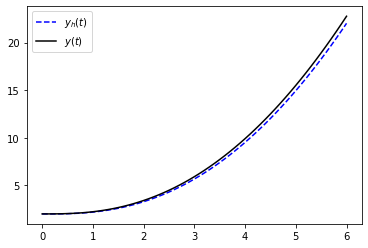

In [4]:
# define funcao
f = lambda t,y: (y + t**2 - 2)/(t+1)

# invoca metodo
t0 = 0.0
tf = 6.0
y0 = 2.0
h = 0.1
t,y = euler_expl(t0,tf,y0,h,f)

# plota funcoes 
yex = t**2 + 2*t + 2 - 2*(t+1)*log(t+1)
plt.plot(t,y,'b--',label='$y_h(t)$')
plt.plot(t,yex,'k',label='$y(t)$')
plt.legend()

Agora, vamos computar a curva do erro relativo e plotá-la.

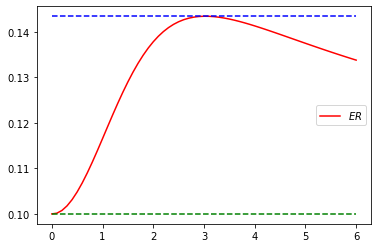

In [5]:
def erro_relativo(y,yh):
    return abs(y-yh)/abs(yh)

e = erro_relativo(yex,y)+0.1

plt.plot(t,e,'r',label='$ER$')
plt.legend()
emax = np.max(e)
emin = np.min(e)

plt.plot(t,np.ones(t.shape)*emax,'b--')
plt.plot(t,np.ones(t.shape)*emin,'g--')

**Exercício:** Resolva o PVI do exemplo anterior usando por computador para $h = 0.2, 0.1, 0.05$. Produza um `script` para imprimir, para cada $h$, os dados da saída na forma da tabela a seguir: 

|$t$|$y_{h}$$(t)$|$EA$|$ER$|
|--|--|--|--|
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|

## Análise de erro

A análise de erro para o método de Euler tem o propósito de entender como o método funciona para que se possa estimar o erro ao usá-lo e, possivelmente, acelerar sua convergência. Procedimentos similares são aplicáveis a métodos numéricos mais eficientes. 

Para a análise, assumiremos que o PVI padrão possui solução única $y(t)$ em $[t_0,b]$ e que esta solução tem uma segunda derivada $y''(t)$ limitada neste intervalo. 

Consideremos a série de Taylor para aproximar $y(t_{n+1})$:

$$y(t_{n+1}) = y(t_{n}) + hy'(t_{n}) + \dfrac{h^2}{2}y''(\xi_{n}), \ \ t_n \leq \xi_n \leq t_{n+1}$$

Uma vez que $y(t)$ satisfaz a EDO, temos que 

$$y(t_{n+1}) = y(t_{n}) + hf(t_{n},y(t_n)) + \dfrac{h^2}{2}y''(\xi_{n}), \ \ t_n \leq \xi_n \leq t_{n+1}$$

O termo $T_{n+1} = \dfrac{h^2}{2}y''(\xi_{n})$, _erro de truncamento_ para o método de Euler, é o erro na aproximação

$$y(t_{n+1}) \approx y(t_{n}) + hy'(t_{n}).$$

Assim, tendo em vista que 

$$y_{n+1} \approx y_n + hf(t_{n},y_n),$$

subtraímos as equações para obter 

$$y(t_{n+1}) - y_{n+1} \approx y(t_{n}) - y_n + h[ f(t_{n},y(t_n)) - f(t_{n},y_n)] + \dfrac{h^2}{2}y''(\xi_{n}),$$

mostrando que o error em $y_{n+1}$ consiste de duas partes: 

- **erro propagado:** $T_{n+1} = y(t_{n}) - y_n + h[ f(t_{n},y(t_n)) - f(t_{n},y_n)]$.
- **erro de truncamento:** $T_{n+1} = \dfrac{h^2}{2}y''(\xi_{n})$.

O erro propagado pode ser simplificado pelo teorema do valor médio: 

$$f(t_{n},y(t_n)) - f(t_{n},y_n) = \dfrac{\partial f(t_n,\zeta_n)}{\partial y}[y(t_n) - y_n], \ \ y(t_n) \leq \zeta_n < y_n$$

Se definirmos o erro $e_k = y(t_k) - y_k, k \geq 0$, podemos reescrever a última equação como 

$$e_{n+1} = \left[ 1 + h \dfrac{\partial f(t_n,\zeta_n)}{\partial y} \right]e_n + T_{n+1},$$

assim obtendo uma equação geral para análise de erro do método de Euler.



### Teoremas para limite de erro 

**Teorema:** Suponha que $f(t,y)$ seja definida em um conjunto convexo $D \subset \mathbb{R}^2$. Se existe uma constante $L>0$ com 

$$\left| \dfrac{\partial f}{\partial y}(t,y)\right| \leq L, \ \ \forall(t,y) \in D$$

**Teorema (limite de erro):** Suponha que f seja contínua e satisfaça a condição de Lipschitz com constante $L$ em 
$D = \{ (t,y); \ a \leq t \leq b \}$ e que exista uma constante $M$ com $|y''(t)| \leq M, \ \ \forall t \in [a,b]$. Seja $y(t)$ única solução do PVI 

$$y' = f(t,y), \quad y(a) = y_0, \quad t_0 \leq t \leq b$$

e sejam $w_0,w_1,\ldots,w_N$ aproximações geradas pelo método de Euler para algum inteiro positivo $N$. Então, para cada $i=0,1,2,\ldots,N$, 

$$|y(t_i)-w_i| \leq \frac{hM}{2L}[e^{L(t_i-a)} -1].$$

O último teorema fornece um limitante de erro para o método de Euler. Ele evidencia a dependência linear do tamanho de passo $h$. Logo, à medida que $h->0$, uma maior precisão nas aproximações deve ser obtida.



**Exemplo:** Consideremos o PVI

$$\begin{cases}
y'(t) = y - t^2 + 1 \\
y(0) = 0.5 \\
0 \le t \le 2 \\ 
h = 0.2
\end{cases}$$

Uma vez que $f(t,y) = y - t^2 + 1$, temos $\dfrac{\partial f}{\partial y}(t,y) = 1, \forall y$. Assim, $L=1$. A solução exata deste problema é $y(t) = (t+1)^2 - 0.5e^t$, de modo que $y''(t) = 2 - 0.5e^t$ e $|y''(t)| \leq 0.5e^2 - 2 = M, \ \ \forall t \in [0,2]$. Pelo teorema do limite de erro, temos que 

$$|y_i - w_i| \leq 0.1(0.5e^2-2)(e^{t_i}-1)$$

In [6]:
def f(t,y):
    return y - t**2 + 1

# solucao numerica 
t,y = euler_expl(0,2,0.5,0.2,f)

# solucao exata
yex = (t+1)**2 - 0.5*np.exp(t)

# erro
erro = np.abs(y - yex)

# limite de erro 
lim_erro = 0.1*(0.5*np.exp(1)**2 - 2)*(np.exp(t) - 1.)

# tabela

print("Imprimindo comparação...\n\n ti |    ei   |   Ei\n")
for i in range(len(y)): 
    print("{0:.1f} | {1:0.5f} | {2:0.5f}\n".format(t[i],erro[i],lim_erro[i]))




Imprimindo comparação...

 ti |    ei   |   Ei

0.0 | 0.00000 | 0.00000

0.2 | 0.02930 | 0.03752

0.4 | 0.06209 | 0.08334

0.6 | 0.09854 | 0.13931

0.8 | 0.13875 | 0.20767

1.0 | 0.18268 | 0.29117

1.2 | 0.23013 | 0.39315

1.4 | 0.28063 | 0.51771

1.6 | 0.33336 | 0.66985

1.8 | 0.38702 | 0.85568

2.0 | 0.43969 | 1.08264



## Problemas

1) Resolva os seguintes problemas usando o método de Euler com passos $h = 0.2,0.1,0.05$. Compute o erro relativo usando a solução exata $y(t)$. Para valores selecionados de $t$, observe a razão com que o erro diminui à medida que $h$ é reduzido pela metade. 
a. $y'(t) = [\cos(y(t))]^2, 0 \leq t \leq 10, \quad y(0) = 0; \quad y(t) = \tan^{-1}(t)$

b. $y'(t) = \frac{1}{1+t^2} − 2[y(t)]^2, 0 \leq t \leq 10, \quad  y(0) = 0; \quad y(t) = \frac{t}{1+t^2}$

c. $y'(t) = \frac{1}{4}y(t)\left[1 - \frac{1}{20}y(t)􏰍\right], 0 \leq t \leq 20, \quad  y(0) = 1; \quad y(t) = \frac{20}{1 + 19e^{-t/4}}$

d. $y'(t)= -[y(t)]^2, y(t) = \frac{1}{t}, 1 \leq t \leq 10, \quad  y(1) = 1 \quad y(t) = \frac{1}{t}$

2) Considere o problema linear 

$$y'(t) = \lambda y(t) + (1 - \lambda) \cos(t) - (1 + \lambda) \textrm{sen}(t), \quad y(0) = 1.$$

A solução exata é $y(t) = \textrm{sen}(t) + \cos(t)$. Resolva este problema usando o método de Euler com vários valores de $\lambda$ e $h$, para $0 \leq t \leq 10$. Comente sobre os resultados.

a. $\lambda = −1; \ \ h = 0.5, 0.25, 0.125$.

b. $\lambda =1; \ \ h=0.5,0.25,0.125.$

c. $\lambda = −5; h = 0.5, 0.25, 0.125, 0.0625.$

d. $\lambda = 5; h = 0.125, 0.0625.$


3) Faça uma análise do erro obtido pelo método de Euler ao ser resolver o caso a. do problema 2, $h = 0.25$.